# Problem a)

[584, 591, 590, 578, 594, 598, 597, 600]


<Container object of 8 artists>

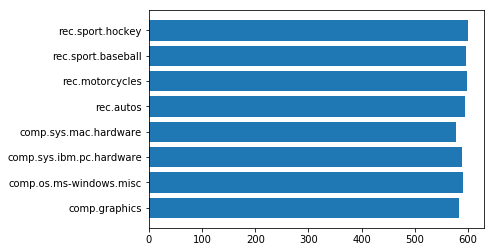

In [2]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
import numpy as np


categories =['comp.graphics','comp.os.ms-windows.misc','comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
dataLen = []
train_datas =[]
for cat in categories:
    raw_train = fetch_20newsgroups(subset='train',categories = [cat],shuffle=True, random_state =42)
    train_datas.append(raw_train.data)
    dataLen.append(len(raw_train.data))
print(dataLen)
# the histogram of the data
plt.barh(categories,dataLen)

# Problem b)

### Stopping words

In [3]:
# tokenize -> stem -> remove punctuation & stop words
import numpy as np
import nltk
import matplotlib.pyplot as plt
from pickle import dump

from sklearn.feature_extraction import text
stop_words_skt = text.ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
nltk.download('stopwords' )
stop_words_en = stopwords.words('english')
from string import punctuation
combined_stopwords = set.union(set(stop_words_en),set(punctuation),set(stop_words_skt))



[nltk_data] Downloading package stopwords to /Users/Roy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### lemmatizer

In [4]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk import pos_tag
#nltk.download('punkt')#, if you need "tokenizers/punkt/english.pickle", choose it
# nltk.download('averaged_perceptron_tagger')
wnl = nltk.wordnet.WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
def lemmatize_sent_demo(text): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(nltk.word_tokenize(text))]
def lemmatize_sent(list_word): 
    # Text input is string, returns array of lowercased strings(words).
    return [wnl.lemmatize(word.lower(), pos=penn2morphy(tag)) 
            for word, tag in pos_tag(list_word)]
# lemmatize_sent('He is walking to school')

[nltk_data] Downloading package punkt to /Users/Roy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/Roy/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/Roy/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# overwrite analyzer with callable function:
from sklearn.feature_extraction.text import CountVectorizer
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))
def stem_rmv_punc(doc):
    return (word for word in lemmatize_sent(analyzer(doc)) if word not in combined_stopwords and not word.isdigit())

In [6]:
# tokenize -> stem -> remove punctuation & stop words
import numpy as np
import matplotlib.pyplot as plt
from pickle import dump

from sklearn.datasets import fetch_20newsgroups
comp_categories = [ 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
rec_categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset='train', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)
twenty_test = fetch_20newsgroups(subset='test', categories=comp_categories+rec_categories, shuffle=True, random_state=42,)
counts = []

### TFxIDF

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
min_dfs = [2,5] 
print(min_dfs[1:])
def TF_builder(min_df,twenty_train,twenty_test):
    count_vect = CountVectorizer(min_df=min_df,analyzer=stem_rmv_punc)
    X_train_counts = count_vect.fit_transform(twenty_train)
    X_test_counts = count_vect.transform(twenty_test)
    return X_train_counts,X_test_counts

for min_df in min_dfs[1:]:
    X_train_counts,X_test_counts = TF_builder(min_df,twenty_train.data,twenty_test.data)
    print(X_train_counts.shape, X_test_counts.shape) 

[5]
(4732, 10396) (3150, 10396)


In [8]:
#TDIDF of 8 classes
from sklearn.feature_extraction.text import TfidfTransformer

def TFIDF_builder(X_train_counts1,X_test_counts1 ):
    tfidf_transformer = TfidfTransformer()
    train_tfidf = tfidf_transformer.fit_transform(X_train_counts1)
    test_tfidf = tfidf_transformer.transform(X_test_counts1)
    return train_tfidf,test_tfidf

train_tfidf,test_tfidf = TFIDF_builder(X_train_counts, X_test_counts)

# probelm c)

In [9]:
#TFICF 
all_category = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian','alt.atheism','comp.graphics','comp.os.ms-windows.misc','comp.windows.x','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey','sci.crypt','sci.electronics','sci.med','sci.space','talk.politics.guns','talk.politics.mideast','talk.politics.misc','talk.religion.misc']
new_bigstring_class = []
for cat in all_category:
    new_train = fetch_20newsgroups(subset='train',categories = [cat], shuffle=True, random_state =42)
    #stem
    new_bigstring_class.append(" ".join(new_train.data))
# print(len(new_bigstring_class))
count_vect_class = CountVectorizer(min_df=min_dfs[1],analyzer=stem_rmv_punc)
new_tf_class= count_vect_class.fit_transform(new_bigstring_class)
print(new_tf_class.shape)
tficf_transformer = TfidfTransformer()
train_tficf = tficf_transformer.fit_transform(new_tf_class)

(20, 10225)


In [10]:
# find the top 10
new_sort = train_tficf.toarray()
#print(type(new_sort))
index=[]
i = 0
for termCount in new_sort:
    termCount.sort()
    index.append(np.argwhere(train_tficf.toarray()[i]>=termCount[::-1][:10][-1]))
    i+=1
#print not in order
for x in range(4):
    print([count_vect_class.get_feature_names()[i[0]] for i in index[x] ])

['com', 'controller', 'drive', 'edu', 'ide', 'line', 'organization', 'scsi', 'subject', 'use']
['apple', 'edu', 'line', 'mac', 'organization', 'post', 'problem', 'scsi', 'subject', 'use']
['com', 'edu', 'line', 'new', 'offer', 'organization', 'post', 'sale', 'subject', 'university']
['christian', 'church', 'edu', 'god', 'jesus', 'know', 'line', 'people', 'say', 'subject']


# Problem d)
functions get LSI and NMF

### LSI

In [11]:

from sklearn.decomposition import TruncatedSVD
def LSI_deduction(train_tfidf,test_tfidf):
    SVD = TruncatedSVD(n_components=50)
    train_LSI = SVD.fit_transform(train_tfidf)
    test_LSI = SVD.transform(test_tfidf)
    return train_LSI,test_LSI

train_LSI,test_LSI = LSI_deduction(train_tfidf,test_tfidf)
print(train_LSI.shape)
print(test_LSI.shape)


(4732, 50)
(3150, 50)


### NMF

In [12]:
#NMF
from sklearn.decomposition import NMF
def NMF_deduction(train_tfidf,test_tfidf):
    model = NMF(n_components=50, init='random', random_state=0)
    train_NMF = model.fit_transform(train_tfidf)
    test_NMF = model.transform(test_tfidf)
    return train_NMF,test_NMF

train_NMF,test_NMF = NMF_deduction(train_tfidf,test_tfidf)
print(train_NMF.shape)
print(test_NMF.shape)

(4732, 50)
(3150, 50)


# Problem e) SVM

### ROC plot function

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

In [14]:
def plot_roc(fpr, tpr):
    fig, ax = plt.subplots()

    roc_auc = auc(fpr,tpr)

    ax.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % roc_auc)

    ax.grid(color='0.7', linestyle='--', linewidth=1)

    ax.set_xlim([0, 1.1])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate',fontsize=15)
    ax.set_ylabel('True Positive Rate',fontsize=15)

    ax.legend(loc="lower right")

    for label in ax.get_xticklabels()+ax.get_yticklabels():
        label.set_fontsize(15)

def fit_predict_and_plot_roc(pipe, train_data, train_label, test_data, test_label):
    pipe.fit(train_data, train_label)
    # pipeline1.predict(twenty_test.data)

    prob_score = pipe.predict_proba(test_data)

    fpr, tpr, _ = roc_curve(test_label, prob_score[:,1])

    plot_roc(fpr, tpr)
    return pipe

def print_result(train_label, predicted_label):   
    print("Confusion_matrix is \n", confusion_matrix(train_label,predicted_label))
    print("Accuracy is \n",accuracy_score(train_label,predicted_label))
    print("Recall score is \n", recall_score(train_label,predicted_label,average='macro'))
    print("Precision score is \n", precision_score(train_label,predicted_label,average='macro'))

In [15]:
# try plot with pipe


# from sklearn.pipeline import Pipeline
# pipeline_svm_hard = Pipeline([
#     ('vect', CountVectorizer(min_df=5,analyzer=stem_rmv_punc)),
#     ('tfidf', TfidfTransformer()),
#     ('reduce_dim', NMF(n_components=50, init='random', random_state=0)),
#     ('clf', svm.SVC(probability=True,C = 1000)),
# ])

# Pipe_svm_hard = fit_predict_and_plot_roc(pipeline_svm_hard, twenty_train.data, twenty_train.target>3, twenty_test.data, twenty_test.target>3)
# # Calculate confusion matrix && accuracy && recall && precision 
# pred = Pipe_svm_hard.predict(twenty_test.data)#########
# print_result(twenty_test.target>3,pred)



### hard svm

Confusion_matrix is 
 [[1493   67]
 [  27 1563]]
Accuracy is 
 0.9701587301587301
Recall score is 
 0.9700350749879052
Precision score is 
 0.9705662738133678


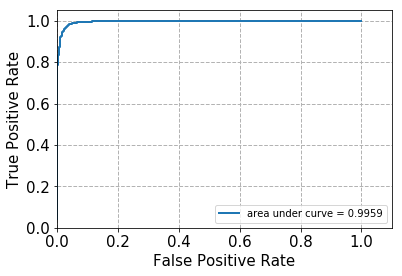

In [18]:
from sklearn.svm import SVC
clf_SVM_hard = SVC(kernel='linear', probability=True,C = 1000)
clf_SVM_hard.fit(train_LSI, twenty_train.target>3)
pred = clf_SVM_hard.predict(test_LSI)
prob_score = clf_SVM_hard.predict_proba(test_LSI)

print_result(twenty_test.target>3,pred)
fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
plot_roc(fpr, tpr)

### soft svm 

Confusion_matrix is 
 [[   0 1560]
 [   0 1590]]
Accuracy is 
 0.5047619047619047
Recall score is 
 0.5
Precision score is 
 0.2523809523809524


/Users/Roy/Desktop/ECE219/ECE219_projects/project_1/.env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


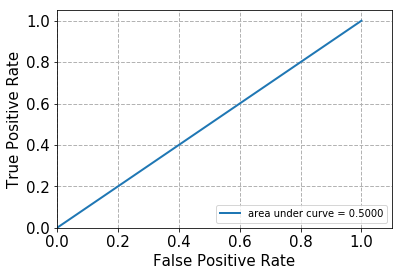

In [19]:
clf_SVM_soft = SVC(kernel='linear', probability=True,C = 0.001)
clf_SVM_soft.fit(train_LSI, twenty_train.target>3)
pred = clf_SVM_soft.predict(test_LSI)
prob_score = clf_SVM_soft.predict_proba(test_LSI)

print_result(twenty_test.target>3,pred)
fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
plot_roc(fpr, tpr)

# Problem f) cross validation
find the best Gammaby 

In [21]:
from sklearn.model_selection import KFold
ks = list(range(-3,4))
#Kfold
kf = KFold(n_splits=5)

for train_index, test_index in kf.split(twenty_train.data):

    data_train = np.array(twenty_train.data)[train_index]
    data_test = np.array(twenty_train.data)[test_index]

    target_train = np.array(twenty_train.target)[train_index]
    target_test = np.array(twenty_train.target)[test_index]

    data_train_counts,data_test_counts = TF_builder(5, data_train,data_test)
    data_train_tfidf,data_test_tfidf = TFIDF_builder(data_train_counts,data_test_counts)
    
    data_train_NMF,data_test_NMF = NMF_deduction(data_train_tfidf,data_test_tfidf)
    
    for k in ks:
        print("-"*10,"k =",k,"-"*10)
        clf_SVM = SVC(kernel='linear', probability=True,C = 10**k)
        clf_SVM.fit(train_LSI, twenty_train.target>3)
        pred = clf_SVM.predict(test_NMF)
        prob_score = clf_SVM.predict_proba(test_NMF)
        
        print_result(twenty_train.target[test_index]>3,pred)
        
        
    

---------- k = -3 ----------


ValueError: Found input variables with inconsistent numbers of samples: [947, 3150]

# Problem g) Naive Bayes

Confusion_matrix is 
 [[1415  145]
 [  35 1555]]
Accuracy is 
 0.9428571428571428
Recall score is 
 0.9425193517174649
Precision score is 
 0.9452839756592292


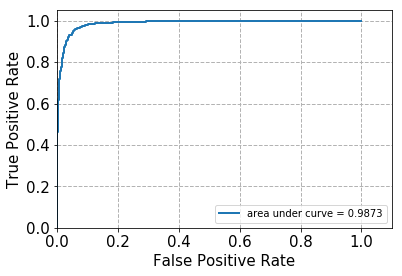

In [22]:
#naive Bayes
from sklearn.naive_bayes import MultinomialNB

# X_train_counts,X_test_counts = TF_builder(min_df,twenty_train.data,twenty_test.data)
# train_tfidf,test_tfidf = TFIDF_builder(X_train_counts, X_test_counts)
# train_NMF,test_NMF = NMF_deduction(train_tfidf,test_tfidf)

clf_NB = MultinomialNB().fit(train_NMF, twenty_train.target>3)
pred = clf_NB.predict(test_NMF)
prob_score = clf_NB.predict_proba(test_NMF)

print_result(twenty_test.target>3,pred)
fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
plot_roc(fpr, tpr)



# Problem h) Logistic Regression

### L2 Norm

Confusion_matrix is 
 [[1456  104]
 [  71 1519]]
Accuracy is 
 0.9444444444444444
Recall score is 
 0.9443396226415095
Precision score is 
 0.94471236776834


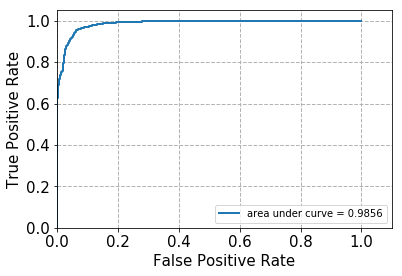

In [23]:
from sklearn.linear_model import LogisticRegression


clf_LR = LogisticRegression().fit(train_NMF, twenty_train.target>3)
pred = clf_LR.predict(test_NMF)
prob_score = clf_LR.predict_proba(test_NMF)

print_result(twenty_test.target>3,pred)
fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
plot_roc(fpr, tpr)

# Problem I) Logistic Regression with regularization 

### L1 Norm with regulization 

In [24]:
Cs = list(range(-3,4))
for C in Cs:
    print('-'*8,"C=",C,"-"*8)
    clf_LR = LogisticRegression(penalty='l1', C = 10**C).fit(train_NMF, twenty_train.target>3)
    pred = clf_LR.predict(test_NMF)
    prob_score = clf_LR.predict_proba(test_NMF)
    
    print_result(twenty_test.target>3,pred)
#     fpr, tpr, _ = roc_curve(twenty_test.target>3, prob_score[:,1])
#     plot_roc(fpr, tpr)
    
    

-------- C= -3 --------
Confusion_matrix is 
 [[1560    0]
 [1590    0]]
Accuracy is 
 0.49523809523809526
Recall score is 
 0.5
Precision score is 
 0.24761904761904763
-------- C= -2 --------
Confusion_matrix is 
 [[1560    0]
 [1590    0]]
Accuracy is 
 0.49523809523809526
Recall score is 
 0.5
Precision score is 
 0.24761904761904763
-------- C= -1 --------
Confusion_matrix is 
 [[1404  156]
 [ 519 1071]]
Accuracy is 
 0.7857142857142857
Recall score is 
 0.7867924528301886
Precision score is 
 0.801484920032498
-------- C= 0 --------
Confusion_matrix is 
 [[1490   70]
 [  44 1546]]
Accuracy is 
 0.9638095238095238
Recall score is 
 0.9637276245766813
Precision score is 
 0.9639999935456387
-------- C= 1 --------
Confusion_matrix is 
 [[1491   69]
 [  49 1541]]
Accuracy is 
 0.9625396825396826
Recall score is 
 0.9624758103531689
Precision score is 
 0.9626623376623377
-------- C= 2 --------


/Users/Roy/Desktop/ECE219/ECE219_projects/project_1/.env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion_matrix is 
 [[1492   68]
 [  53 1537]]
Accuracy is 
 0.9615873015873015
Recall score is 
 0.9615384615384616
Precision score is 
 0.9616640958170765
-------- C= 3 --------
Confusion_matrix is 
 [[1492   68]
 [  54 1536]]
Accuracy is 
 0.9612698412698413
Recall score is 
 0.9612239961296565
Precision score is 
 0.9613385681978752


### Norm l2 with regulization

In [25]:
Cs = list(range(-3,4))
for C in Cs:
    print('-'*8,"C=",C,"-"*8)
    clf_LR = LogisticRegression(penalty='l2', C = 10**C).fit(train_NMF, twenty_train.target>3)
    pred = clf_LR.predict(test_NMF)
    prob_score = clf_LR.predict_proba(test_NMF)
    
    print_result(twenty_test.target>3,pred)

-------- C= -3 --------
Confusion_matrix is 
 [[   0 1560]
 [   0 1590]]
Accuracy is 
 0.5047619047619047
Recall score is 
 0.5
Precision score is 
 0.2523809523809524
-------- C= -2 --------
Confusion_matrix is 
 [[ 217 1343]
 [   0 1590]]
Accuracy is 
 0.5736507936507936
Recall score is 
 0.569551282051282
Precision score is 
 0.771053528810092
-------- C= -1 --------
Confusion_matrix is 
 [[1382  178]
 [  64 1526]]
Accuracy is 
 0.9231746031746032
Recall score is 
 0.9228229317851959
Precision score is 
 0.9256399392203846
-------- C= 0 --------
Confusion_matrix is 
 [[1456  104]
 [  71 1519]]
Accuracy is 
 0.9444444444444444
Recall score is 
 0.9443396226415095
Precision score is 
 0.94471236776834
-------- C= 1 --------
Confusion_matrix is 
 [[1466   94]
 [  54 1536]]
Accuracy is 
 0.953015873015873
Recall score is 
 0.9528906627963232
Precision score is 
 0.9534024862770423
-------- C= 2 --------
Confusion_matrix is 
 [[1476   84]
 [  52 1538]]
Accuracy is 
 0.9568253968253968
Re

/Users/Roy/Desktop/ECE219/ECE219_projects/project_1/.env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Confusion_matrix is 
 [[1488   72]
 [  52 1538]]
Accuracy is 
 0.9606349206349206
Recall score is 
 0.9605708756652154
Precision score is 
 0.9607566346696781


# Problem ii) Multiclass Classification

In [26]:
# Get data from 4 categories 
from sklearn.datasets import fetch_20newsgroups
categories_multi = ['comp.sys.ibm.pc.hardware','comp.sys.mac.hardware','misc.forsale','soc.religion.christian']
train_multi = fetch_20newsgroups(subset='train', categories=categories_multi, shuffle=True, random_state=42,)
test_multi = fetch_20newsgroups(subset='test', categories=categories_multi, shuffle=True, random_state=42,)

# Perform tfidf on documents from these 4 categories (min_df = 2)
TF_train_multi,TF_test_multi = TF_builder(min_dfs[0],train_multi.data,test_multi.data)
print(TF_train_multi.shape, TF_test_multi.shape)
train_multi_tfidf,test_multi_tfidf = TFIDF_builder(TF_train_multi, TF_test_multi)

# NMF on tfidf
train_multi_NMF,test_multi_NMF = NMF_deduction(train_multi_tfidf,test_multi_tfidf)
print(train_multi_NMF.shape)

# LSI of tfidf
train_multi_LSI,test_multi_LSI = LSI_deduction(train_multi_tfidf,test_multi_tfidf)
print(train_multi_LSI.shape)

(2352, 12339) (1565, 12339)
(2352, 50)
(2352, 50)


### Naive Bayes Classification

In [27]:
#naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB
clf_multiNB = MultinomialNB().fit(train_multi_NMF, train_multi.target)
pred_NB = clf_multiNB.predict(test_multi_NMF)
prob_score_NB = clf_multiNB.predict_proba(test_multi_NMF)

#print out result
print_result(test_multi.target,pred_NB)

Confusion_matrix is 
 [[318  25  43   6]
 [ 99 238  43   5]
 [ 68  14 289  19]
 [  1   0   4 393]]
Accuracy is 
 0.7910543130990415
Recall score is 
 0.7894672837332564
Precision score is 
 0.8012844398855866


### SVM one-to-one (NMF)

In [28]:
# SVC assumes the one-vs-one as a multiclass classifier
from sklearn.svm import SVC
clf_SVM_multi = SVC(kernel='linear', C = 100)
clf_SVM_multi.fit(train_multi_NMF,train_multi.target)
pred_NMF = clf_SVM_multi.predict(test_multi_NMF)

#print out result
print_result(test_multi.target,pred_NMF)

Confusion_matrix is 
 [[328  38  26   0]
 [ 72 285  26   2]
 [ 46  15 326   3]
 [ 10   0   7 381]]
Accuracy is 
 0.8434504792332268
Recall score is 
 0.8425445755488828
Precision score is 
 0.8490733476909559


### SVM one-to-one (LSI)

In [29]:
clf_SVM_multi = SVC(kernel='linear', C = 100)
clf_SVM_multi.fit(train_multi_LSI,train_multi.target)
pred_LSI = clf_SVM_multi.predict(test_multi_LSI)

#print out result
print_result(test_multi.target,pred_LSI)

Confusion_matrix is 
 [[328  34  29   1]
 [ 42 319  24   0]
 [ 22  19 347   2]
 [  4   1   1 392]]
Accuracy is 
 0.8856230031948882
Recall score is 
 0.8849935838270369
Precision score is 
 0.8853131079914038


### SVM one-to-rest(NMF)

In [30]:
# LinearSVC assumes one-vs-rest implementation of a multiclass classifier
from sklearn.svm import LinearSVC
clf_SVM_multi = LinearSVC(loss="hinge", C = 100)
clf_SVM_multi.fit(train_multi_NMF,train_multi.target)
pred_NMF = clf_SVM_multi.predict(test_multi_NMF)

#print out result
print_result(test_multi.target,pred_NMF)

Confusion_matrix is 
 [[293  68  28   3]
 [ 53 303  25   4]
 [ 32  17 336   5]
 [  3   0   3 392]]
Accuracy is 
 0.8460063897763578
Recall score is 
 0.8452312628147158
Precision score is 
 0.8443491483221125


### SVM one-to-rest(LSI) 

In [31]:
# LinearSVC assumes one-vs-rest implementation of a multiclass classifier
from sklearn.svm import LinearSVC
clf_SVM_multi = LinearSVC(loss="hinge", C = 100)
clf_SVM_multi.fit(train_multi_LSI,train_multi.target)
pred_LSI = clf_SVM_multi.predict(test_multi_LSI)

#print out result
print_result(test_multi.target,pred_LSI)

Confusion_matrix is 
 [[315  51  25   1]
 [ 36 324  23   2]
 [ 19  18 351   2]
 [  2   1   2 393]]
Accuracy is 
 0.8837060702875399
Recall score is 
 0.8831417640148795
Precision score is 
 0.88296453138925
